# The Steady State Case

The solution to the Poisson equation with concentration distributions

\begin{align}
C_+^{(SS)}(x) = C_b \exp{\frac{z\mathcal{F}\phi_0(x)}{RT}}\\
C_-^{(SS)}(x) = C_b \exp{\frac{-z\mathcal{F}\phi_0(x)}{RT}}
\end{align}

The potential is

\begin{align}
\phi_0(x) = \frac{2RT}{zF}\log\left(\tanh\left(\frac{\kappa(x-x_0)}{2}\right)\right)\\
x_0 = -tanh\left(\frac{z\mathcal{F}V_0}{4RT}\right)
\end{align}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
from decimal import Decimal
from analyticSol.solutionV2 import *

with open('../../ch03/code/model_parameters.json') as file:
    params = json.loads(file.read())

z = params['z']
F = params['Fa']
V0 = params['V0']
R = params['R']
T = params['T']
Cb = params['bulkConcentration']
epsilon = params['epsilon']
D1 = params['diffusionCoefficientCu']

kappa =  np.sqrt(( ( z * F  ) ** 2 * Cb ) / ( epsilon * R * T ) )

model = model(params)
phi0 = model.phi0 
C1 = model.C0
C2 = model.Cm0
E = model.Efield0

def plot(xi, f, imageName='poisson-boltzman'):

    if(f == 'E'):
        func = E
        ylabel = r'Electric Field $(V/m) \times 10^6 $'
        title = ''#'Electric Field In The Diffusion Problem With Nernst Interaction.'
    elif(f == 'phi'):
        func = phi0
        ylabel = r'Electric Potential $(V)$'
        title = '' #'Electric Potential In The Diffusion Problem With Nernst Interaction.'
         # this is done to avoid cluttering of numeric points over the analytic solution
    elif(f == 'diff'):
        func = phi0(xi) - E(xi)
        ylabel = r'Difference'
        title = '' #'Electric Potential In The Diffusion Problem With Nernst Interaction.'
         # this is done to avoid cluttering of numeric points over the analytic solution
        
    else:
        print("Unkown function. Need something real to plot")
        return -1

    skip = 4
    xi2 = xi
    #xi2 = xi2 / kappa * 1e9#* nanometerScale #change the scale of the scale to nanometer

    to_molar = 1e3
  
    plt.figure(1)
    plt.style.use('thesis')
    fig, ax2 = plt.subplots()

    color = 'black'
    ax2.tick_params(axis='y', labelcolor=color)
    ax1 = ax2.twinx() 
    color = 'black'

    plt.title(title, fontweight='bold')

    

    ax1.plot(xi2, C1(xi2), 'g', label=r'$C_+$')
    ax1.plot(xi2, C2(xi2),'r', label=r'$C_-$')
    ax1.legend()
    if f == 'E':
        ax2.plot(xi2, kappa*func(xi2)/ 1e6, 'b', color='tab:blue', label=r'$E$')
    if f == 'phi':
        ax2.plot(xi2, func(xi2), 'b', color='tab:blue', label=r'$\phi$')
    if f == 'diff':
        ax2.plot(xi2, func, 'b', color='tab:blue', label=r'$diff$')

    ax1.set_xlabel(r'Distance from the interface plate (nm)')
    ax1.set_ylabel(r'Molar Concentration')
    ax2.set_ylabel(ylabel)
    ax2.tick_params(axis='y', labelcolor=color)


    ax2.legend(loc=(0.87, 0.75))


    ################################## Plot parameters ##################################
    textstr = '\n'.join((
        r'$V_0=%.2f V$' % Decimal(V0),
        #r'$k_f=%.2f m/s$' % Decimal(kf),
        r'$\kappa=%.2f \mu m^{-1}$' % Decimal(kappa /1e6),
        r'$C_b=%.2f M$' % Decimal(1e3 * Cb),))


    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax1.text(0.83, 0.2, textstr, transform=ax1.transAxes, fontsize=30, verticalalignment='top', bbox=props)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    print("saving to:"+'../../img/steady-state-'+ imageName + f +'.eps')
    plt.savefig('../../../img/steady-state-'+ imageName + f +'.eps', dpi=1000, fontweight='bold')

    plt.show()


saving to:../../img/steady-state-poisson-boltzmanphi.eps


<Figure size 1440x1152 with 0 Axes>

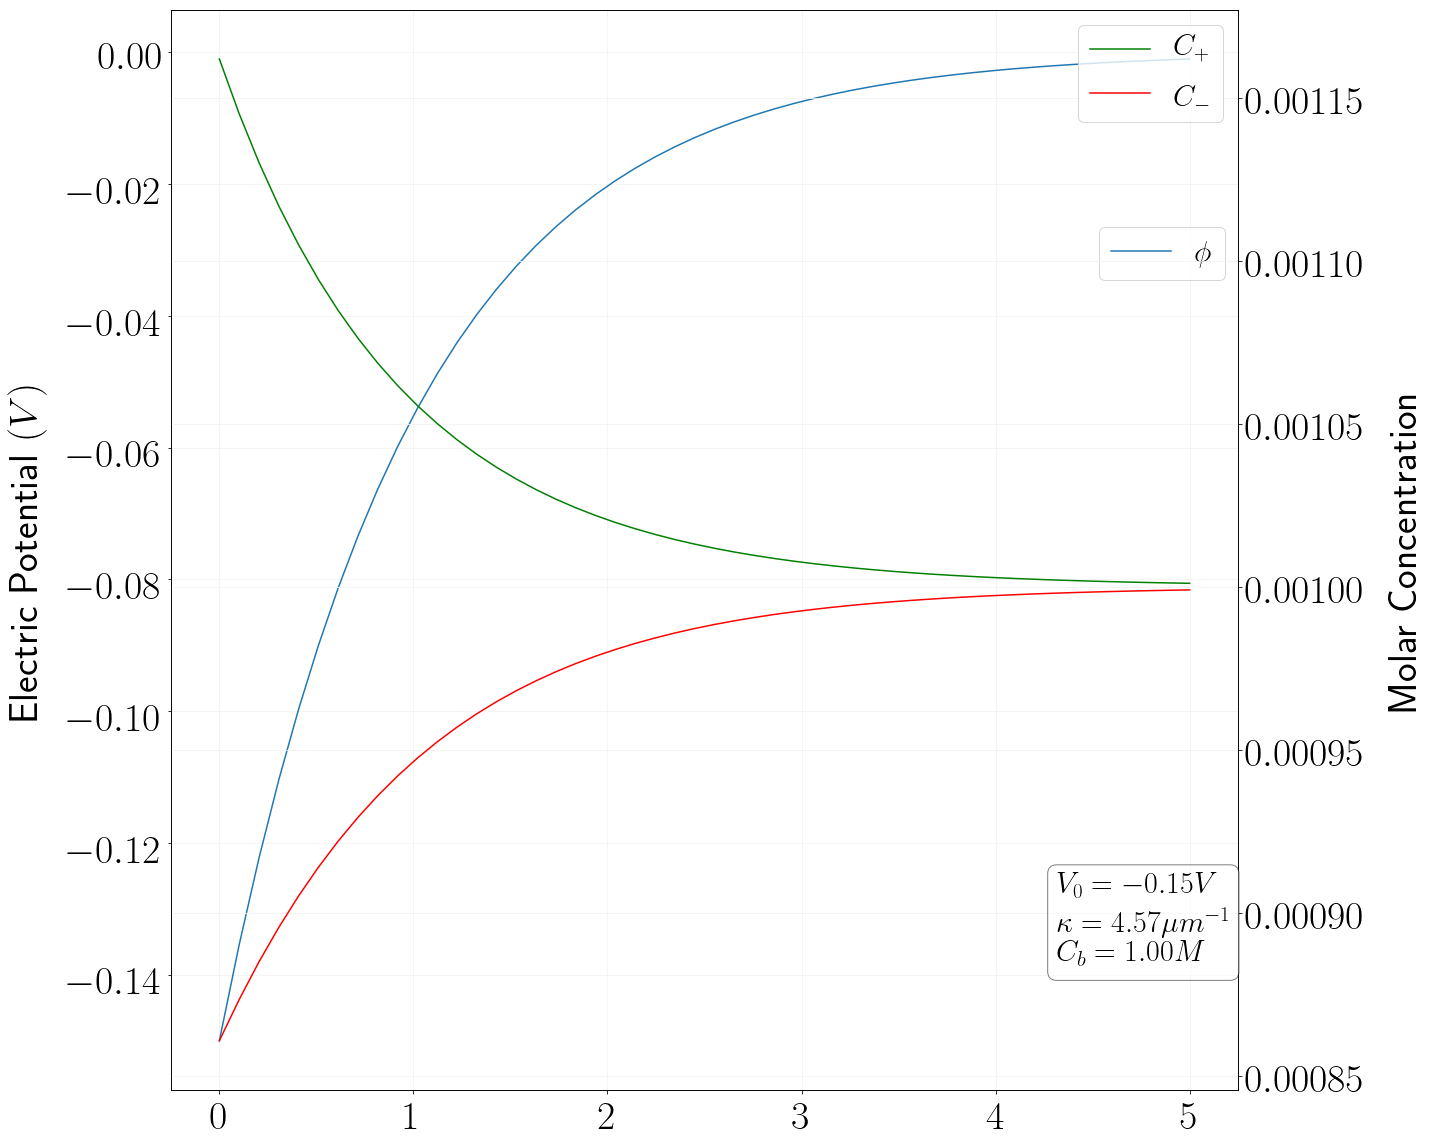

saving to:../../img/steady-state-poisson-boltzmanE.eps


<Figure size 1440x1152 with 0 Axes>

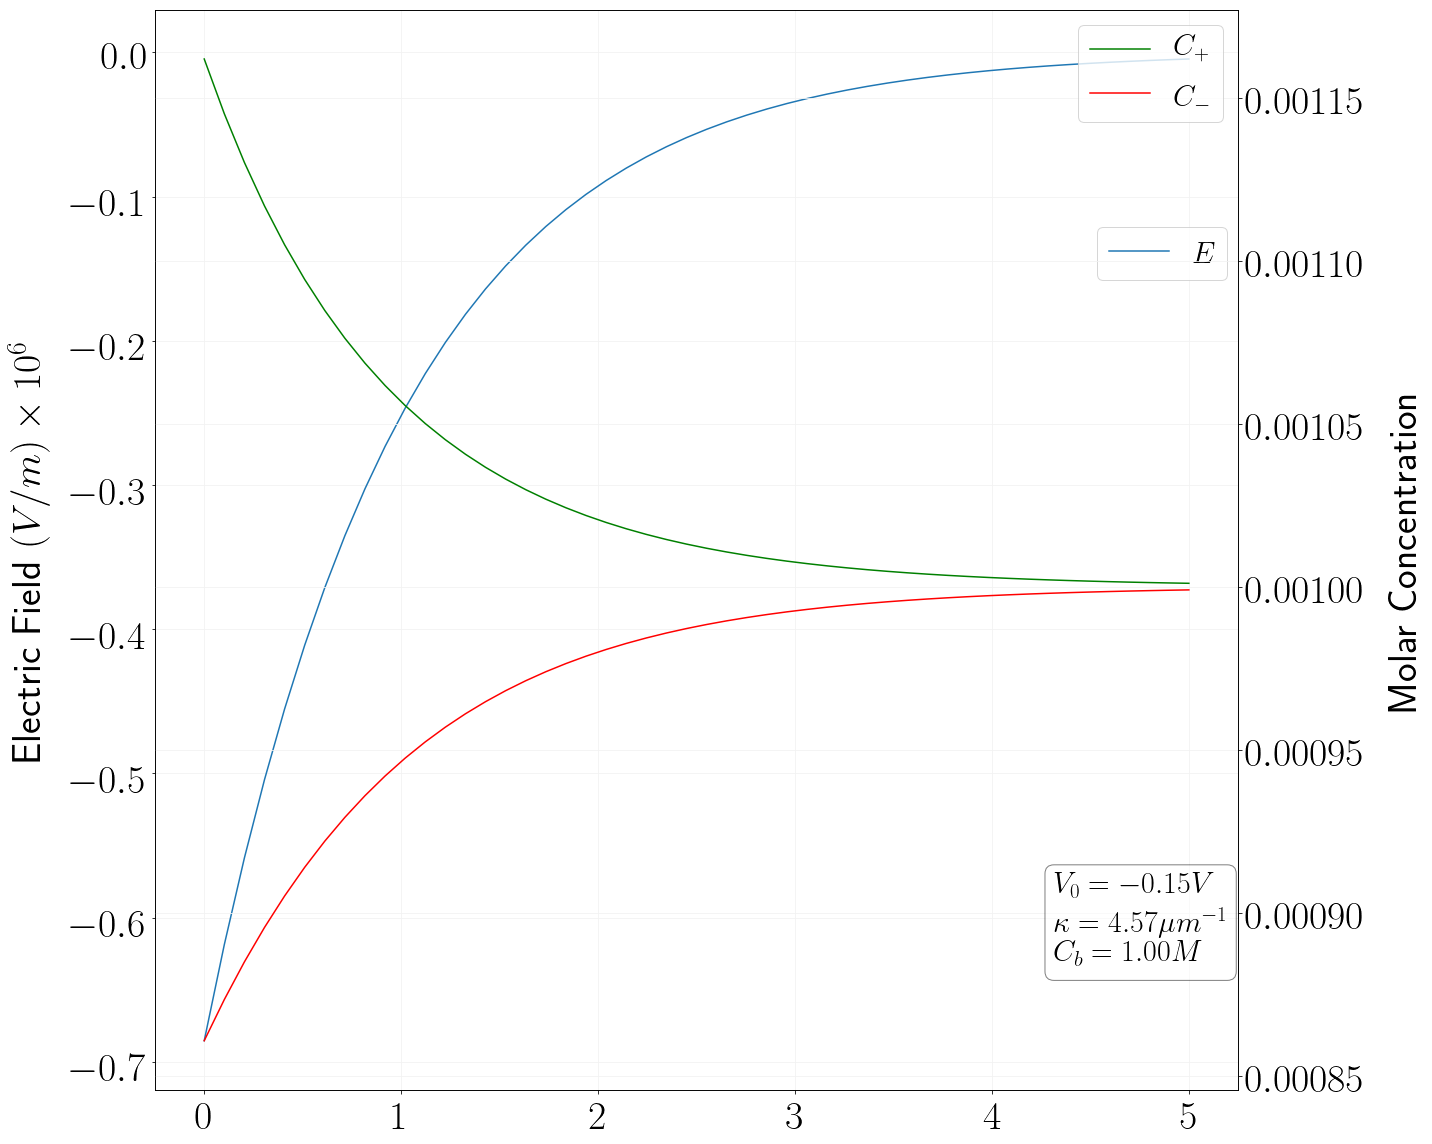

In [4]:
xi = np.linspace(0,params["length"], 50)

plot(xi, f ='phi')
plot(xi, f ='E')